In [25]:
# import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn.functional as F
import torch.optim as optim
import torch.nn as nn
import matplotlib.pyplot as plt
import seaborn as sns
import time
import warnings
warnings.filterwarnings('ignore')

In [30]:
sns.set_style("whitegrid")
sns.set_context("paper")

In [2]:
def plot_accuracy(model_PATH, img_PATH):
    
    train_accuracy_list = torch.load(model_PATH)['train_accuracy_list']
    valid_accuracy_list = torch.load(model_PATH)['valid_accuracy_list']
    plt.plot(train_accuracy_list, label='Training Accuracy')
    plt.plot(valid_accuracy_list, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.title('Accuracy vs. Epochs')
    plt.savefig(img_PATH)
    plt.show()

In [3]:
def plot_losses(model_PATH, img_PATH):
    
    train_loss_list = torch.load(model_PATH)['train_loss_list']
    valid_loss_list = torch.load(model_PATH)['valid_loss_list']
    plt.plot(train_loss_list, label='Training loss')
    plt.plot(valid_loss_list, label='Validation loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss per batch')
    plt.legend(loc='best')
    plt.title('Losses vs. Epochs')
    plt.savefig(img_PATH)
    plt.show()

In [39]:
def plot_comparison(model_list, plot_train=True, start=0, figsize =(7, 5)):
    plt.figure(figsize=figsize)
    if plot_train:
        for model in model_list:
            loss = torch.load(model)['train_loss_list']
            plt.plot(loss[start:], label = model[13:-4])
        plt.title('Training Loss vs. Epochs')
    else:
        for model in model_list:
            loss = torch.load(model)['valid_loss_list']
            plt.plot(loss[start:], label = model[13:-4])
        plt.title('Validation Loss vs. Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss per batch')
    plt.legend(loc='best')
    plt.show()

In [49]:
def plot_acc_comparison(model_list, plot_train=True, start=0, figsize =(7, 5)):
    plt.figure(figsize=figsize)
    if plot_train:
        for model in model_list:
            acc = torch.load(model)['train_accuracy_list']
            plt.plot(acc[start:], label = model[13:-4])
        plt.title('Training Accuracy vs. Epochs')
    else:
        for model in model_list:
            acc = torch.load(model)['valid_accuracy_list']
            plt.plot(acc[start:], label = model[13:-4])
        plt.title('Validation Accuracy vs. Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(loc='best')
    plt.show()

In [55]:
def show_valid_acc(model_list):
    acc_list = []
    for model in model_list:
        acc = torch.load(model)['valid_accuracy_list']
        acc_list.append(round(acc[-1], 4))
    print('Validation Accuracy: \n', acc_list)

### Comparison among four sequences

For each strategy(epoch, cutoff, oscillate), compare the result of four sequences and the benchmark.

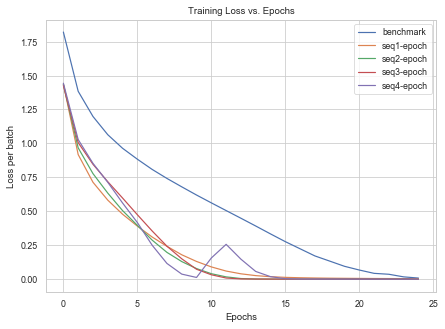

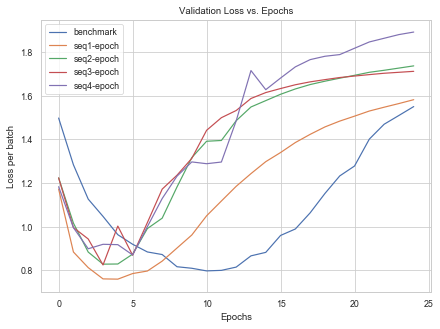

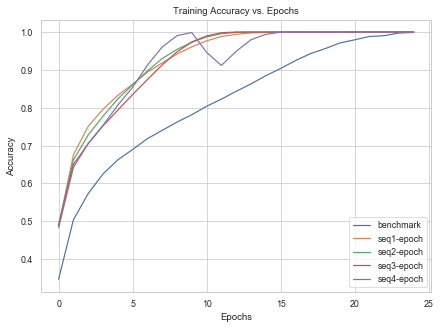

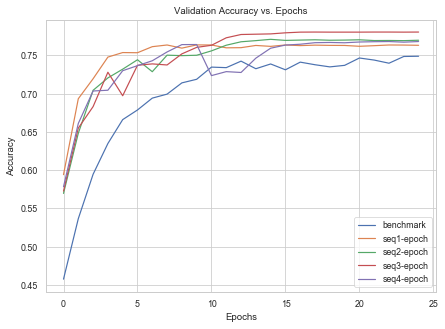

Validation Accuracy: 
 [0.7487, 0.763, 0.7696, 0.7803, 0.7679]


In [56]:
# when by epoch, comparison among four seqs
model_list = ['models/cifar/benchmark.pth', 'models/cifar/seq1-epoch.pth', 
              'models/cifar/seq2-epoch.pth', 'models/cifar/seq3-epoch.pth', 
             'models/cifar/seq4-epoch.pth']
plot_comparison(model_list, plot_train=True, start=0)
plot_comparison(model_list, plot_train=False, start=0)
plot_acc_comparison(model_list, plot_train=True, start=0)
plot_acc_comparison(model_list, plot_train=False, start=0)
show_valid_acc(model_list)

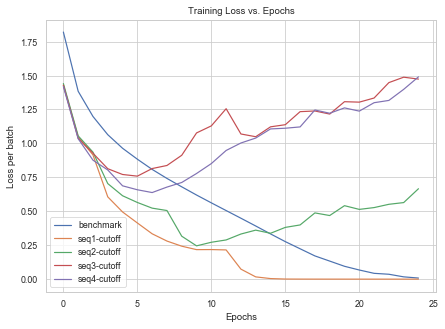

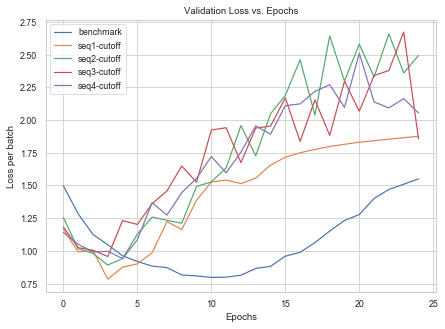

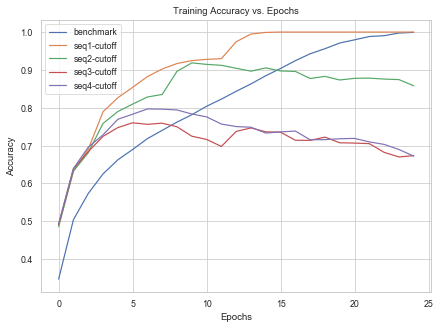

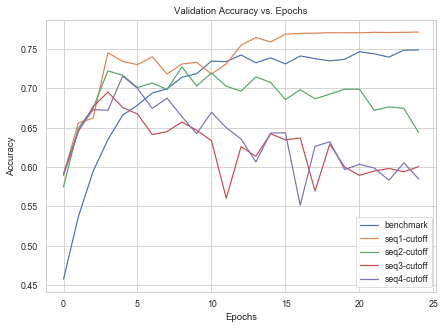

Validation Accuracy: 
 [0.7487, 0.7714, 0.6438, 0.6004, 0.5848]


In [57]:
# when by cutoff, comparison among four seqs
model_list = ['models/cifar/benchmark.pth', 'models/cifar/seq1-cutoff.pth', 
              'models/cifar/seq2-cutoff.pth', 'models/cifar/seq3-cutoff.pth', 
             'models/cifar/seq4-cutoff.pth']
plot_comparison(model_list, plot_train=True, start=0)
plot_comparison(model_list, plot_train=False, start=0)
plot_acc_comparison(model_list, plot_train=True, start=0)
plot_acc_comparison(model_list, plot_train=False, start=0)
show_valid_acc(model_list)

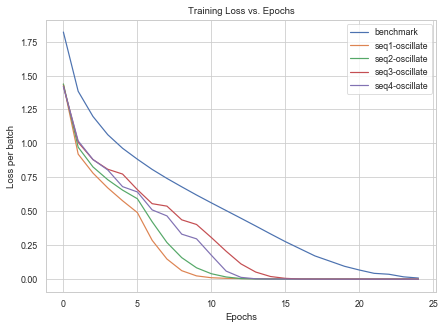

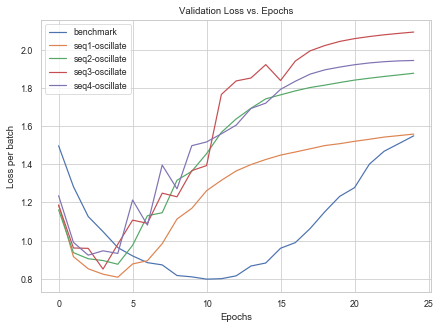

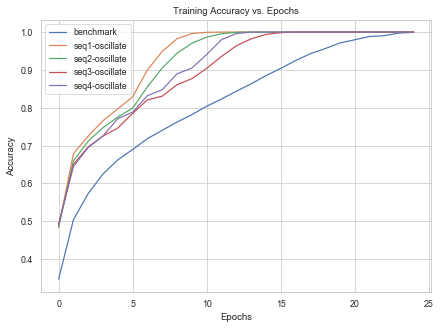

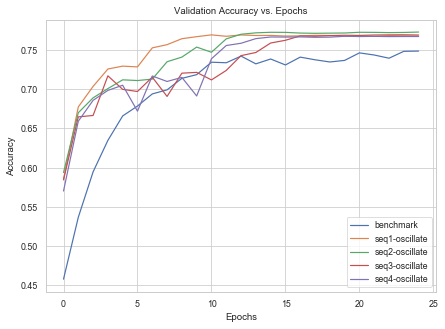

Validation Accuracy: 
 [0.7487, 0.7677, 0.773, 0.7692, 0.7673]


In [60]:
# when by oscillate, comparison among four seqs
model_list = ['models/cifar/benchmark.pth', 'models/cifar/seq1-oscillate.pth', 
              'models/cifar/seq2-oscillate.pth', 'models/cifar/seq3-oscillate.pth', 
             'models/cifar/seq4-oscillate.pth']
plot_comparison(model_list, plot_train=True, start=0)
plot_comparison(model_list, plot_train=False, start=0)
plot_acc_comparison(model_list, plot_train=True, start=0)
plot_acc_comparison(model_list, plot_train=False, start=0)
show_valid_acc(model_list)

### Comparison among three strategies
For each sequence(seq1, seq2, seq3, seq4), compare the result of three strategies and the benchmark.

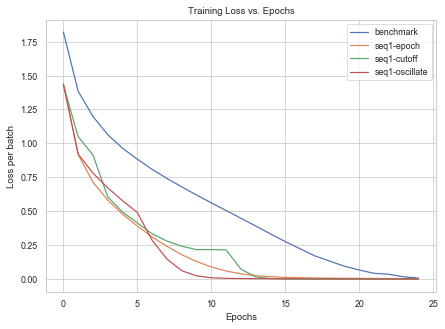

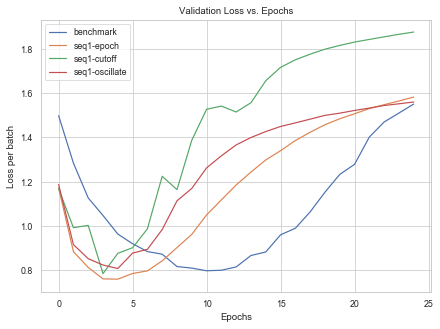

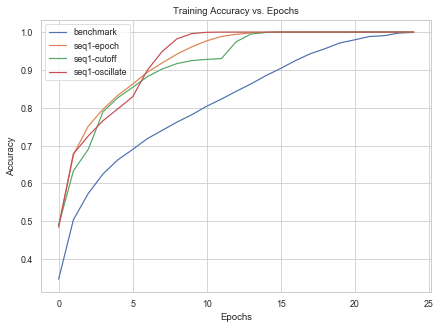

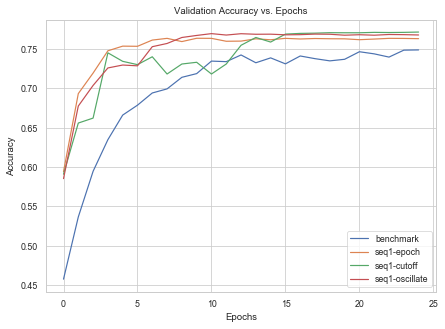

In [44]:
# when using seq1, comparison among three strategies
model_list = ['models/cifar/benchmark.pth', 'models/cifar/seq1-epoch.pth', 'models/cifar/seq1-cutoff.pth', 
             'models/cifar/seq1-oscillate.pth']
plot_comparison(model_list, plot_train=True, start=0)
plot_comparison(model_list, plot_train=False, start=0)
plot_acc_comparison(model_list, plot_train=True, start=0)
plot_acc_comparison(model_list, plot_train=False, start=0)

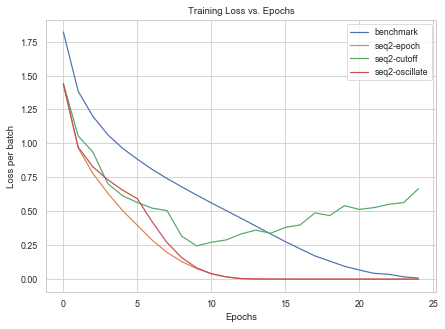

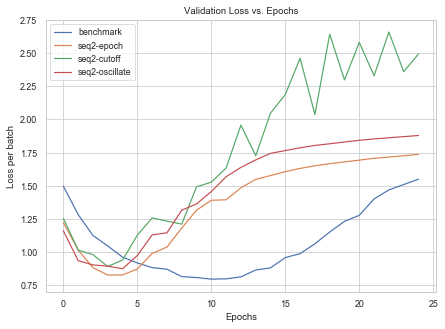

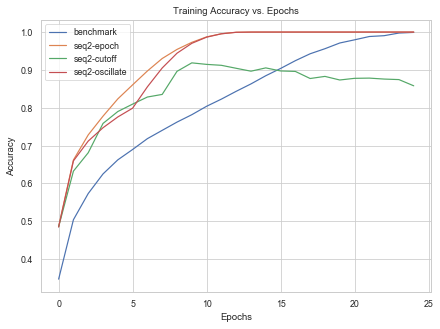

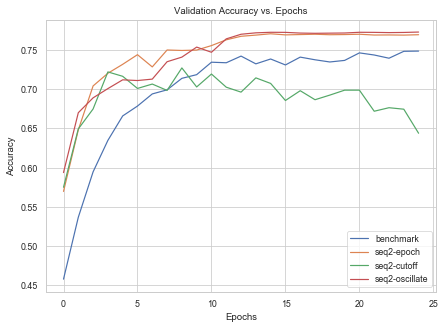

In [45]:
# when using seq2, comparison among three strategies
model_list = ['models/cifar/benchmark.pth', 'models/cifar/seq2-epoch.pth', 'models/cifar/seq2-cutoff.pth', 
             'models/cifar/seq2-oscillate.pth']
plot_comparison(model_list, plot_train=True, start=0)
plot_comparison(model_list, plot_train=False, start=0)
plot_acc_comparison(model_list, plot_train=True, start=0)
plot_acc_comparison(model_list, plot_train=False, start=0)

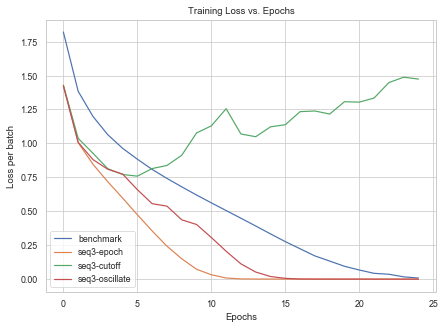

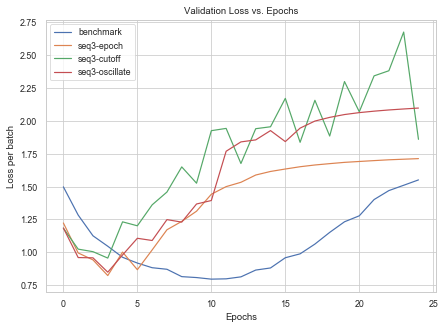

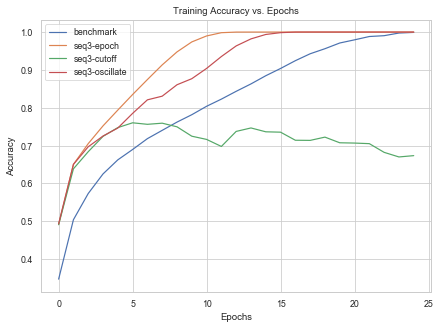

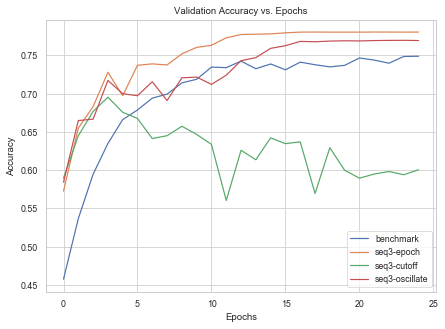

In [61]:
# when using seq3, comparison among three strategies
model_list = ['models/cifar/benchmark.pth', 'models/cifar/seq3-epoch.pth', 'models/cifar/seq3-cutoff.pth', 
             'models/cifar/seq3-oscillate.pth']
plot_comparison(model_list, plot_train=True, start=0)
plot_comparison(model_list, plot_train=False, start=0)
plot_acc_comparison(model_list, plot_train=True, start=0)
plot_acc_comparison(model_list, plot_train=False, start=0)

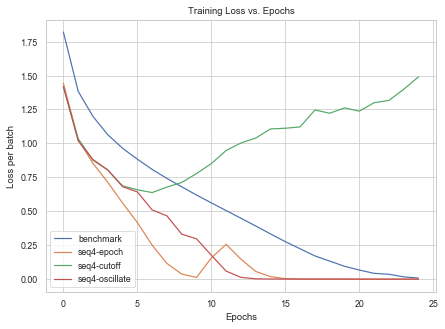

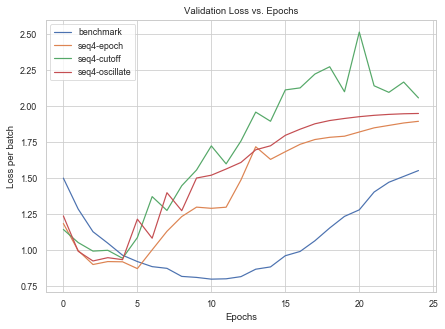

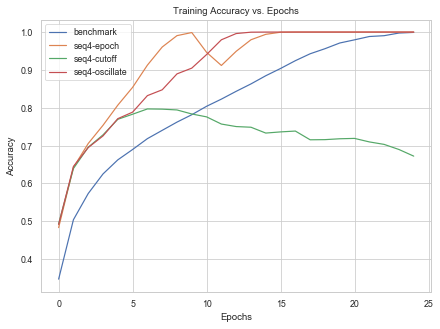

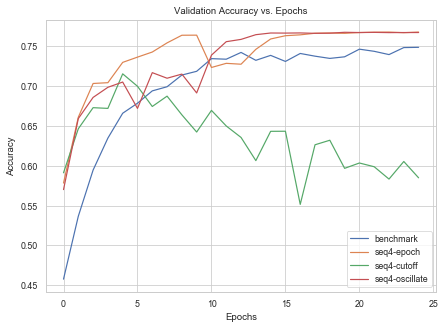

In [47]:
# when using seq4, comparison among three strategies
model_list = ['models/cifar/benchmark.pth', 'models/cifar/seq4-epoch.pth', 'models/cifar/seq4-cutoff.pth', 
             'models/cifar/seq4-oscillate.pth']
plot_comparison(model_list, plot_train=True, start=0)
plot_comparison(model_list, plot_train=False, start=0)
plot_acc_comparison(model_list, plot_train=True, start=0)
plot_acc_comparison(model_list, plot_train=False, start=0)

### Comparison among optimal combinations and benchmarks

For each sequence, pick the best performing strategy. Compare these optimal combinations with two benchmarks.
- SGD benchmark
- Adam benchmark
- seq3-epoch
- seq1-cutoff
- seq2-oscillate

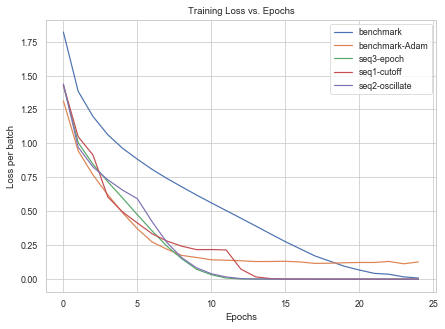

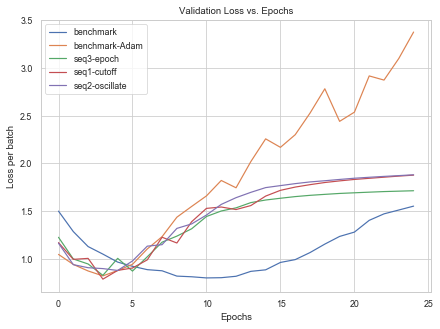

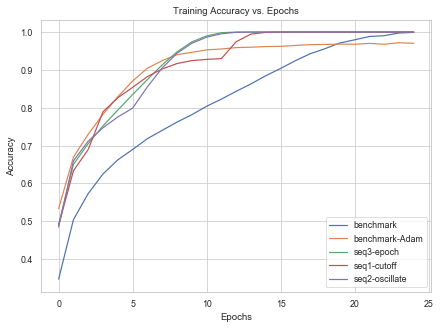

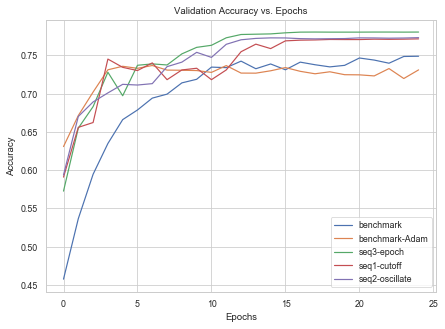

Validation Accuracy: 
 [0.7487, 0.7309, 0.7803, 0.7714, 0.773]


In [63]:
# compare among the optimal ones for each strategy
model_list = ['models/cifar/benchmark.pth', 'models/cifar/benchmark-Adam.pth','models/cifar/seq3-epoch.pth', 
              'models/cifar/seq1-cutoff.pth', 'models/cifar/seq2-oscillate.pth']
plot_comparison(model_list, plot_train=True, start=0)
plot_comparison(model_list, plot_train=False, start=0)
plot_acc_comparison(model_list, plot_train=True, start=0)
plot_acc_comparison(model_list, plot_train=False, start=0)
show_valid_acc(model_list)

## Epoch Comparison

In [169]:
# func to get the convergence point
def location(model_list):
    location_use = []
    final_value = []
    for model in model_list:
        acc = np.array(torch.load(model)['valid_accuracy_list'])
        acc_diff = abs(acc[1:] - acc[:-1])
        acc_diff2 = acc_diff[:-3] + acc_diff[1:-2] + acc_diff[2:-1] + acc_diff[3:]
        k = np.where(acc_diff2 < 0.009)[0]
        inde = k[0] if len(k)>0 else 25
        location_use.append(inde)
        final_value.append(np.mean(accu[(len(accu)-5):(len(accu)-1)]))
    return(location_use,final_value)

In [172]:
# get the convergent epoch number
model_list = ['models/cifar/benchmark.pth', 'models/cifar/benchmark-Adam.pth','models/cifar/seq1-epoch.pth', 
              'models/cifar/seq2-epoch.pth', 'models/cifar/seq3-epoch.pth', 'models/cifar/seq4-epoch.pth',
             'models/cifar/seq1-cutoff.pth', 'models/cifar/seq2-cutoff.pth', 'models/cifar/seq3-cutoff.pth',
              'models/cifar/seq4-cutoff.pth', 'models/cifar/seq1-oscillate.pth', 'models/cifar/seq2-oscillate.pth',
              'models/cifar/seq3-oscillate.pth', 'models/cifar/seq4-oscillate.pth']
location_use,final_value = location(model_list)
print(location_use)

[25, 17, 8, 12, 11, 14, 15, 25, 25, 25, 8, 11, 15, 12]
